In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# 1. Spambase dataset #

## SVM with the RBF Kernel ##

In [2]:
# Spambase dataset
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 

pd.options.mode.copy_on_write = True
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

Note: you may need to restart the kernel to use updated packages.


In [3]:
print(X.shape)
print(Y.shape)

(4601, 57)
(4601, 1)


In [4]:
# Calculate error given feature vectors X and labels Y
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e


# Draw the heatmap of training errors
def draw_heatmap(training_errors, gamma_list, C_list):
    plt.figure(figsize = (6,5))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f',
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel = r'$\gamma$', ylabel=r'$C$')
    plt.title(r'Cross-validation error wrt $C$ and $\gamma$')
    ax.invert_yaxis()
    plt.xticks(rotation=45)
    plt.show()

In [5]:
# 20-80 partition
# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# Note: chose columns 52, 23 for separability, two common features 
# of spam emails (char_freq_$ and word_freq_money)

# 20-80 partition
X_train = X_shuffled[:920][:,[52,23]]      # Shape: (920, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_shuffled[:920]                 # Shape: (920, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test = X_shuffled[920:][:,[52,23]]         # Shape: (3681, 2)
Y_test = Y_shuffled[920:]                  # Shape: (3681, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(919, 2)
(919,)
(3681, 2)
(3681,)


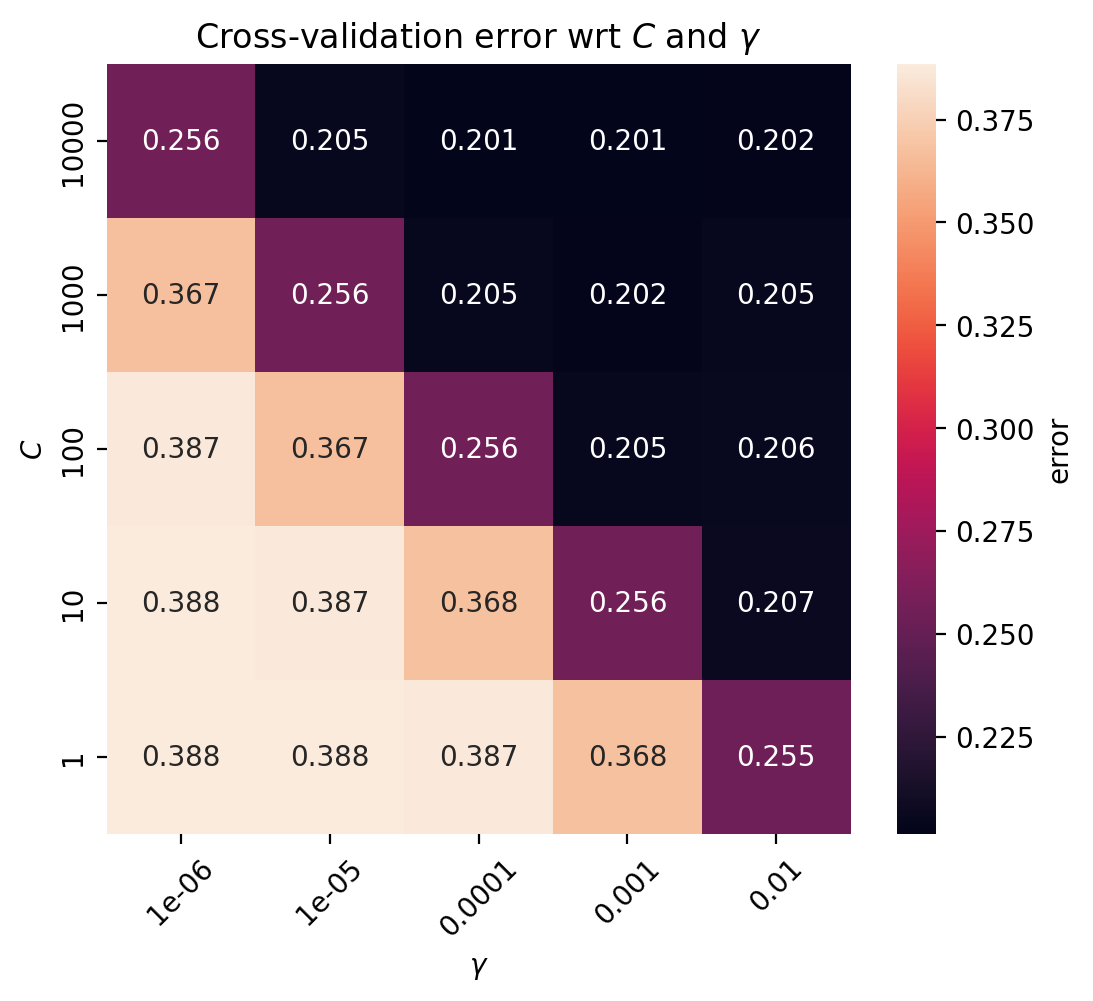

Best CV error = 0.2012948443810881
C* = 10000
gamma* = 0.0001
Training error using optimal classifier = 0.205658324265506
Test error using optimal classifier = 0.20130399348003258


In [6]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros((len(C_list), len(gamma_list)))

best_error = 1.0
opt_C = None
opt_gamma = None
opt_classifier = None

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):

        fold_errors = []

        for train_index, val_index in kf.split(X_train):
            X_tr, X_va = X_train[train_index], X_train[val_index]
            Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

            scaler = StandardScaler()
            X_tr = scaler.fit_transform(X_tr)
            X_va = scaler.transform(X_va)
            
            clf = svm.SVC(C=C, gamma=gamma, kernel='rbf')
            clf.fit(X_tr, Y_tr)

            fold_errors.append(calc_error(X_va, Y_va, clf))

        cv_error = np.mean(fold_errors)
        cv_errors[i,j] = cv_error

        if cv_error < best_error:
            best_error = cv_error
            opt_C = C
            opt_gamma = gamma

opt_classifier = svm.SVC(C=opt_C, gamma=opt_gamma, kernel='rbf')
opt_classifier.fit(X_train, Y_train)

draw_heatmap(cv_errors, gamma_list, C_list)

train_error = calc_error(X_train, Y_train, opt_classifier)
test_error = calc_error(X_test, Y_test, opt_classifier)
print("Best CV error =", best_error)
print("C* =", opt_C)
print("gamma* =", opt_gamma)
print("Training error using optimal classifier =", train_error)
print("Test error using optimal classifier =", test_error)

In [7]:
# 50-50 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling
np.random.seed(1)               # Set the random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 50-50 partition
X_train = X_shuffled[:2300][:,[52,23]]     # Shape: (2300, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_shuffled[:2300]                # Shape: (2300, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test = X_shuffled[2300:][:,[52,23]]      # Shape: (2301, 2)
Y_test = Y_shuffled[2300:]                 # Shape: (2301, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2299, 2)
(2299,)
(2301, 2)
(2301,)


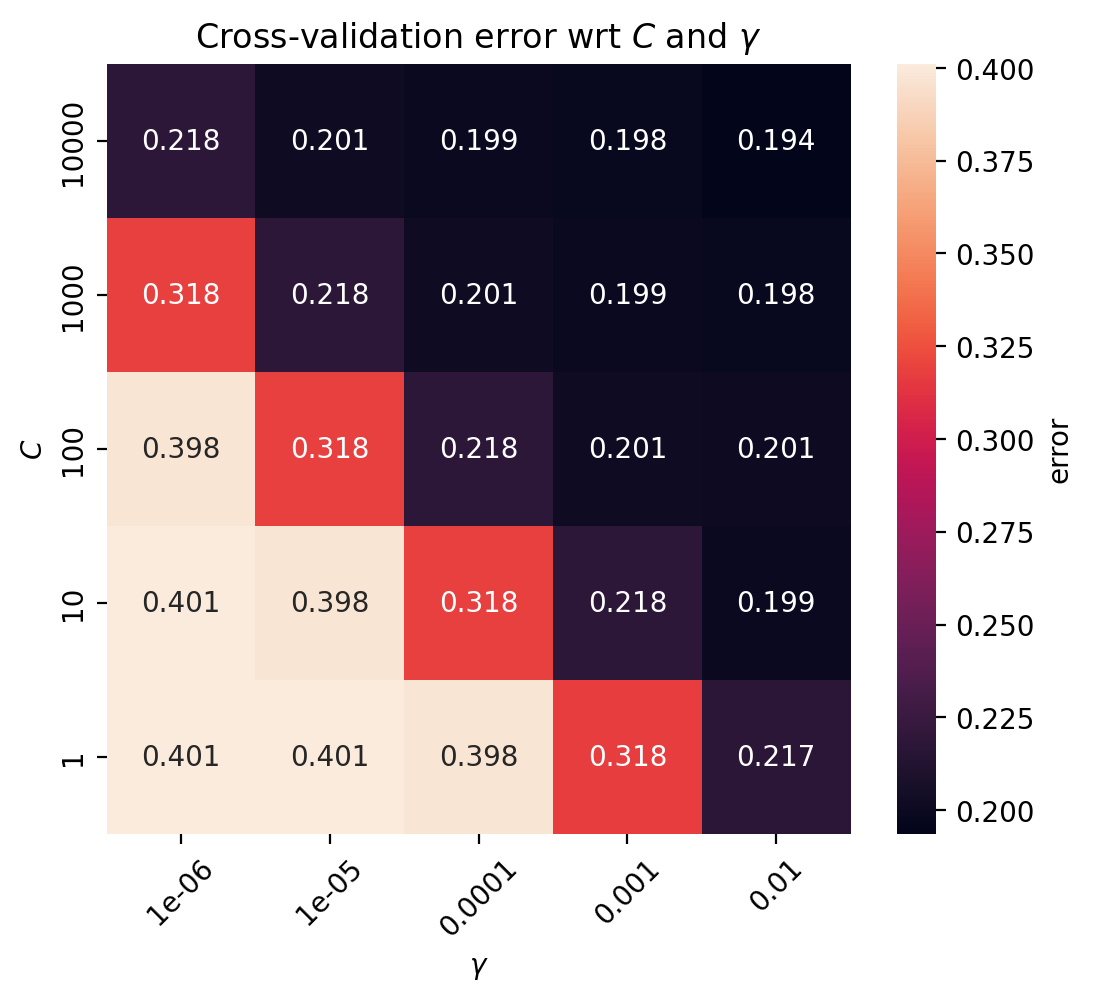

Best CV error = 0.19356161788386853
C* = 10000
gamma* = 0.01
Training error using optimal classifier = 0.19834710743801653
Test error using optimal classifier = 0.18687527162103434


In [8]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros((len(C_list), len(gamma_list)))

best_error = 1.0
opt_C = None
opt_gamma = None
opt_classifier = None

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):

        fold_errors = []

        for train_index, val_index in kf.split(X_train):
            X_tr, X_va = X_train[train_index], X_train[val_index]
            Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

            scaler = StandardScaler()
            X_tr = scaler.fit_transform(X_tr)
            X_va = scaler.transform(X_va)
        
            clf = svm.SVC(C=C, gamma=gamma, kernel='rbf')
            clf.fit(X_tr, Y_tr)

            fold_errors.append(calc_error(X_va, Y_va, clf))

        cv_error = np.mean(fold_errors)
        cv_errors[i,j] = cv_error

        if cv_error < best_error:
            best_error = cv_error
            opt_C = C
            opt_gamma = gamma

opt_classifier = svm.SVC(C=opt_C, gamma=opt_gamma, kernel='rbf')
opt_classifier.fit(X_train, Y_train)

draw_heatmap(cv_errors, gamma_list, C_list)

train_error = calc_error(X_train, Y_train, opt_classifier)
test_error = calc_error(X_test, Y_test, opt_classifier)
print("Best CV error =", best_error)
print("C* =", opt_C)
print("gamma* =", opt_gamma)
print("Training error using optimal classifier =", train_error)
print("Test error using optimal classifier =", test_error)

In [9]:
# 80-20 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 80-20 partition
X_train = X_shuffled[:3680][:,[52,23]]     # Shape: (3680, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_shuffled[:3680]                # Shape: (3680, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test = X_shuffled[3680:][:,[52,23]]      # Shape: (921, 2)
Y_test = Y_shuffled[3680:]                 # Shape: (921, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3679, 2)
(3679,)
(921, 2)
(921,)


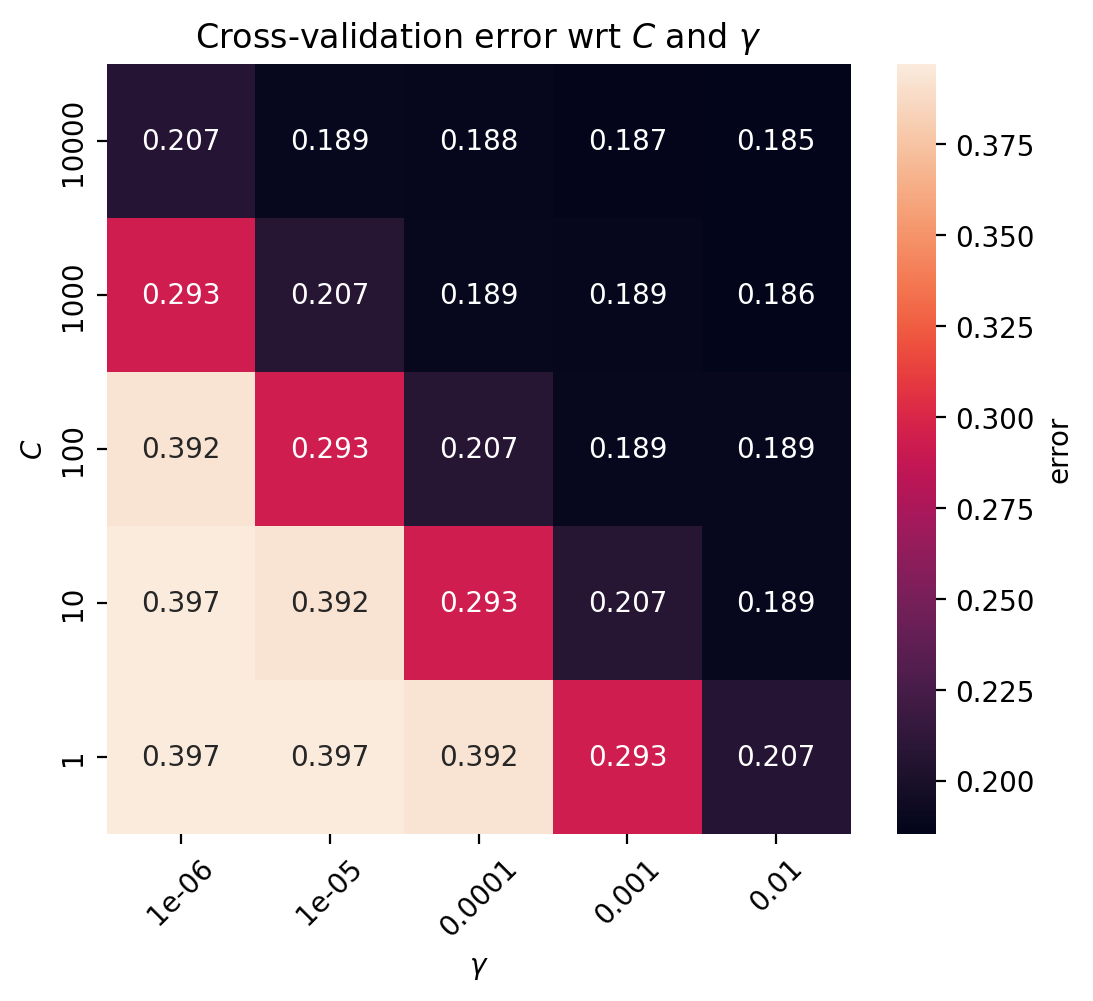

Best CV error = 0.18537193138124813
C* = 10000
gamma* = 0.01
Training error using optimal classifier = 0.1872791519434629
Test error using optimal classifier = 0.2052117263843648


In [10]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros((len(C_list), len(gamma_list)))

best_error = 1.0
opt_C = None
opt_gamma = None
opt_classifier = None

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):

        fold_errors = []

        for train_index, val_index in kf.split(X_train):
            X_tr, X_va = X_train[train_index], X_train[val_index]
            Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

            scaler = StandardScaler()
            X_tr = scaler.fit_transform(X_tr)
            X_va = scaler.transform(X_va)
        
            clf = svm.SVC(C=C, gamma=gamma, kernel='rbf')
            clf.fit(X_tr, Y_tr)

            fold_errors.append(calc_error(X_va, Y_va, clf))

        cv_error = np.mean(fold_errors)
        cv_errors[i,j] = cv_error

        if cv_error < best_error:
            best_error = cv_error
            opt_C = C
            opt_gamma = gamma

opt_classifier = svm.SVC(C=opt_C, gamma=opt_gamma, kernel='rbf')
opt_classifier.fit(X_train, Y_train)

draw_heatmap(cv_errors, gamma_list, C_list)

train_error = calc_error(X_train, Y_train, opt_classifier)
test_error = calc_error(X_test, Y_test, opt_classifier)
print("Best CV error =", best_error)
print("C* =", opt_C)
print("gamma* =", opt_gamma)
print("Training error using optimal classifier =", train_error)
print("Test error using optimal classifier =", test_error)

## Decision Tree - Buntine tree ID3 (using Scikit-Learn) ##

In [11]:
%config InlineBackend.figure_format = 'retina'
import scipy.io as sio
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [12]:
# 20-80 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 20-80 partition (cross-validation creates several 
# (training subset, validation subset) pairs
X_train = X_shuffled[:920][:,[52,23]]       # Shape: (920, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_shuffled[:920]                 # Shape: (920, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test = X_shuffled[920:][:,[52,23]]         # Shape: (3681, 2)
Y_test = Y_shuffled[920:]                  # Shape: (3681, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(919, 2)
(919,)
(3681, 2)
(3681,)


In [13]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=10,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


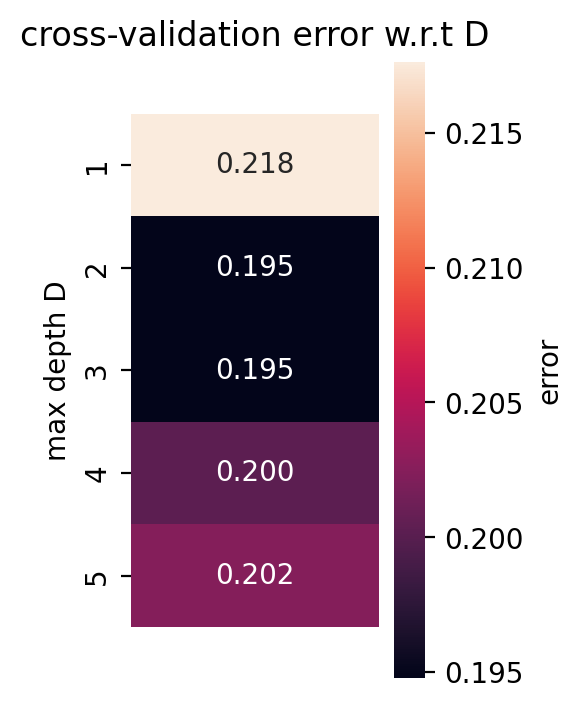

In [14]:
# Draw heatmaps for result of grid search
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

In [15]:
# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

Best max depth D: 2
Training error = 0.18933623503808483
Cross-validated validation error = 0.19476827520305773
Testing error = 0.1812007606628634


In [16]:
# 50-50 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle data points in X_and_Y array

# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 50-50 partition
X_train = X_shuffled[:2300][:,[52,23]]     # Shape: (2300, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_shuffled[:2300]                # Shape: (2300, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test = X_shuffled[2300:][:,[52,23]]      # Shape: (2301, 2)
Y_test = Y_shuffled[2300:]                 # Shape: (2301, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2299, 2)
(2299,)
(2301, 2)
(2301,)


In [17]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=10,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


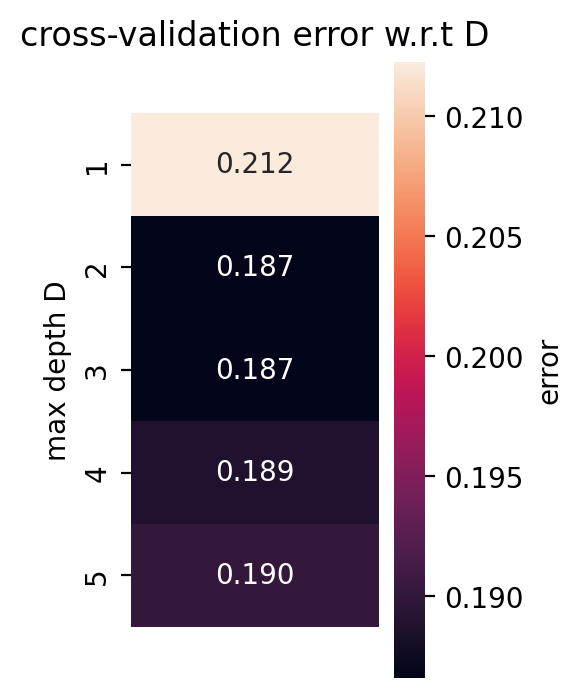

In [18]:
# Draw heatmaps for result of grid search
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

In [19]:
# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

Best max depth D: 2
Training error = 0.1861678990865594
Cross-validated validation error = 0.186593886462882
Testing error = 0.17861799217731422


In [20]:
# 80-20 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 80-20 partition
X_train = X_shuffled[:3680][:,[52,23]]     # Shape: (3680, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_shuffled[:3680]                # Shape: (3680, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test = X_shuffled[3680:][:,[52,23]]      # Shape: (921, 2)
Y_test = Y_shuffled[3680:]                 # Shape: (921, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3679, 2)
(3679,)
(921, 2)
(921,)


In [21]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=10,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


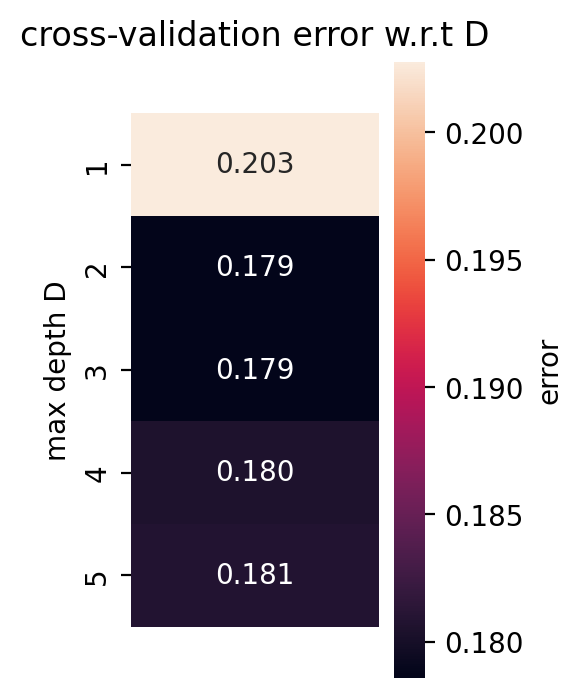

In [22]:
# Draw heatmaps for result of grid search
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

In [23]:
# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

Best max depth D: 2
Training error = 0.17858113617830929
Cross-validated validation error = 0.17857333254353747
Testing error = 0.19761129207383277


# Random Forests ##

In [24]:
%config InlineBackend.figure_format = 'retina'
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [25]:
# 20-80 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 20-80 partition 
X_train = X_shuffled[:920][:,[52,23]]      # Shape: (920, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_shuffled[:920]                 # Shape: (920, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test = X_shuffled[920:][:,[52,23]]         # Shape: (3681, 2)
Y_test = Y_shuffled[920:]                  # Shape: (3681, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(919, 2)
(919,)
(3681, 2)
(3681,)


In [26]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=1
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 1


In [27]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.14907508161044614
Cross-validated validation error = 0.21217034925160372
Test error = 0.19369736484650912


In [28]:
# 50-50 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 50-50 partition
X_train = X_shuffled[:2300][:,[52,23]]     # Shape: (2300, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_shuffled[:2300]                # Shape: (2300, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test = X_shuffled[2300:][:,[52,23]]      # Shape: (2301, 2)
Y_test = Y_shuffled[2300:]                 # Shape: (2301, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2299, 2)
(2299,)
(2301, 2)
(2301,)


In [29]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=1
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 1


In [30]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.15615484993475426
Cross-validated validation error = 0.20268447475608609
Test error = 0.18774445893089964


In [31]:
# 80-20 partition

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 
Y[Y==0] = -1
  
X_and_Y = np.hstack((X, Y))     # Stack together for shuffling
np.random.seed(1)               # Set random seed
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

# Divide the data points into training set and test set
X_shuffled = X_and_Y[:,:57]
Y_shuffled = X_and_Y[:,57]

# 80-20 partition
X_train = X_shuffled[:3680][:,[52,23]]     # Shape: (3680, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_shuffled[:3680]                # Shape: (3680, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test = X_shuffled[3680:][:,[52,23]]      # Shape: (921, 2)
Y_test = Y_shuffled[3680:]                 # Shape: (921, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3679, 2)
(3679,)
(921, 2)
(921,)


In [32]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=1
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 1


In [33]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.15520521880945914
Cross-validated validation error = 0.18754362614611053
Test error = 0.2030401737242128


# 2. Gender by Name dataset

In [34]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import scipy.io as sio
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## SVM with the RBF Kernel ##

In [35]:
# Calculate error given feature vectors X and labels Y
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e


# Draw the heatmap of training errors
def draw_heatmap(training_errors, gamma_list, C_list):
    plt.figure(figsize = (6,5))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f',
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel = r'$\gamma$', ylabel=r'$C$')
    plt.title(r'Cross-validation error wrt $C$ and $\gamma$')
    ax.invert_yaxis()
    plt.xticks(rotation=45)
    plt.show()

In [36]:
# Gender dataset
# 20-80 partition
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

# Sampled dataset because it originally had 147270 points
N = X.shape[0]
sample_size = 5000

idx = np.random.choice(N, size=sample_size, replace=False)
X_sample = X[idx]
Y_sample = Y[idx].reshape(-1)

X_and_Y = np.hstack([X_sample,Y_sample.reshape(-1,1)])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X_shuffled = X_and_Y[:,:num]
Y_shuffled = X_and_Y[:,num]
Y_shuffled = Y_shuffled.astype(int)


# 20-80 partition (using count and probability as two columns)
X_train = X_shuffled[:1000][:,[0,1]]        # Shape: (1000, 2)
X_train = np.delete(X_train, 45, axis=0)     # Remove a point for separability
Y_train = Y_shuffled[:1000]                 # Shape: (1000, )
Y_train = np.delete(Y_train, 45, axis=0)     # Remove a point for separability
X_test = X_shuffled[1000:][:,[0,1]]         # Shape: (4000, 2)
Y_test = Y_shuffled[1000:]                  # Shape: (4000, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Note: you may need to restart the kernel to use updated packages.
(999, 2)
(999,)
(4000, 2)
(4000,)


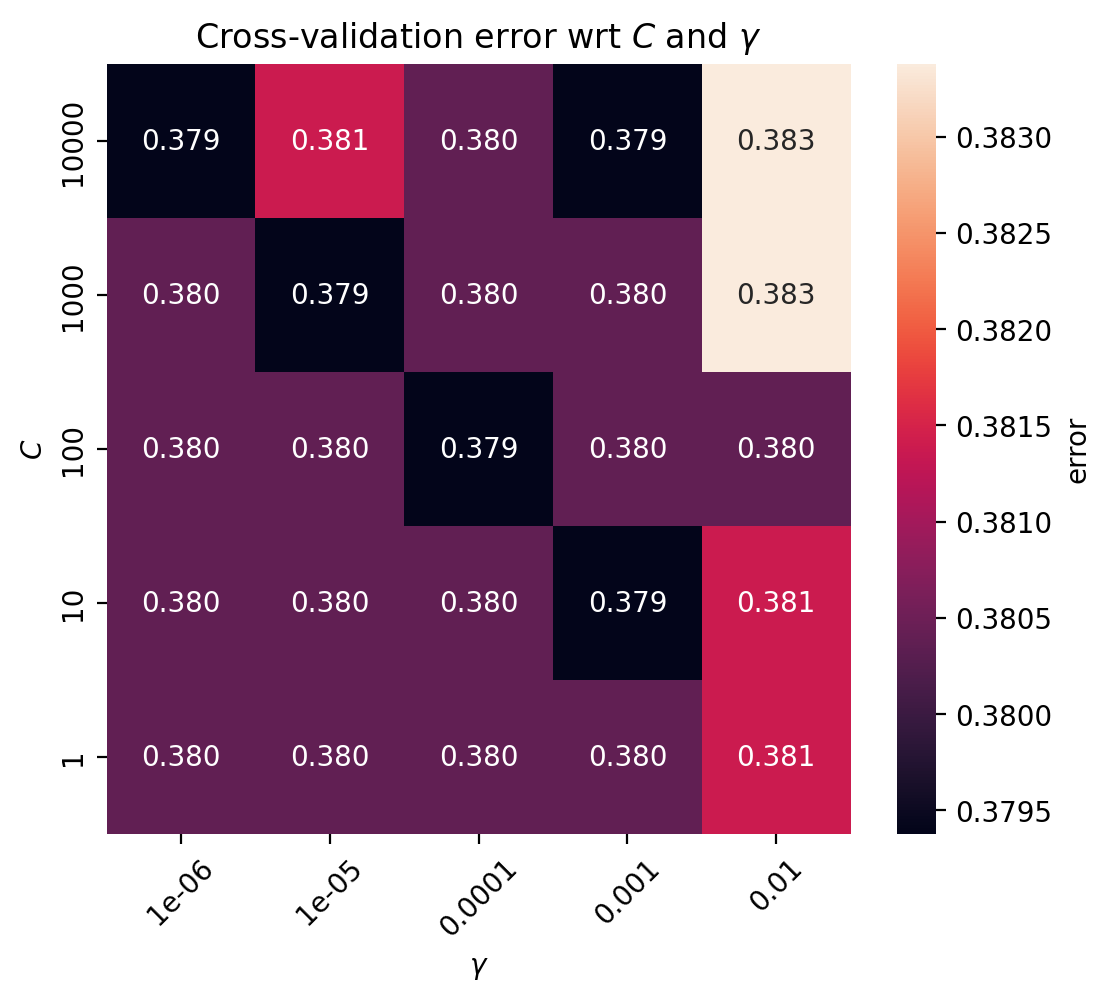

Best CV error = 0.37937688442211054
C* = 10
gamma* = 0.001
Training error using optimal classifier = 0.3413413413413413
Test error using optimal classifier = 0.39649999999999996


In [37]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros((len(C_list), len(gamma_list)))

best_error = 1.0
opt_C = None
opt_gamma = None
opt_classifier = None

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):

        fold_errors = []

        for train_index, val_index in kf.split(X_train):
            X_tr, X_va = X_train[train_index], X_train[val_index]
            Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

            scaler = StandardScaler()
            X_tr = scaler.fit_transform(X_tr)
            X_va = scaler.transform(X_va)
        
            clf = svm.SVC(C=C, gamma=gamma, kernel='rbf')
            clf.fit(X_tr, Y_tr)

            fold_errors.append(calc_error(X_va, Y_va, clf))

        cv_error = np.mean(fold_errors)
        cv_errors[i,j] = cv_error

        if cv_error < best_error:
            best_error = cv_error
            opt_C = C
            opt_gamma = gamma

opt_classifier = svm.SVC(C=opt_C, gamma=opt_gamma, kernel='rbf')
opt_classifier.fit(X_train, Y_train)

draw_heatmap(cv_errors, gamma_list, C_list)

train_error = calc_error(X_train, Y_train, opt_classifier)
test_error = calc_error(X_test, Y_test, opt_classifier)
print("Best CV error =", best_error)
print("C* =", opt_C)
print("gamma* =", opt_gamma)
print("Training error using optimal classifier =", train_error)
print("Test error using optimal classifier =", test_error)

In [38]:
# Gender dataset
# 50-50 partition
  
# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

# Sampled dataset because it originally had 147270 points
N = X.shape[0]
sample_size = 5000

idx = np.random.choice(N, size=sample_size, replace=False)
X_sample = X[idx]
Y_sample = Y[idx].reshape(-1)

X_and_Y = np.hstack([X_sample,Y_sample.reshape(-1,1)])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X_shuffled = X_and_Y[:,:num]
Y_shuffled = X_and_Y[:,num]
Y_shuffled = Y_shuffled.astype(int)

# 50-50 partition (using count and probability as two columns)
X_train = X_shuffled[:2500][:,[0,1]]        # Shape: (2500, 2)
X_train = np.delete(X_train, 45, axis=0)     # Remove a point for separability
Y_train = Y_shuffled[:2500]                 # Shape: (2500, )
Y_train = np.delete(Y_train, 45, axis=0)     # Remove a point for separability
X_test = X_shuffled[2500:][:,[0,1]]         # Shape: (2500, 2)
Y_test = Y_shuffled[2500:]                  # Shape: (2500, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2499, 2)
(2499,)
(2500, 2)
(2500,)


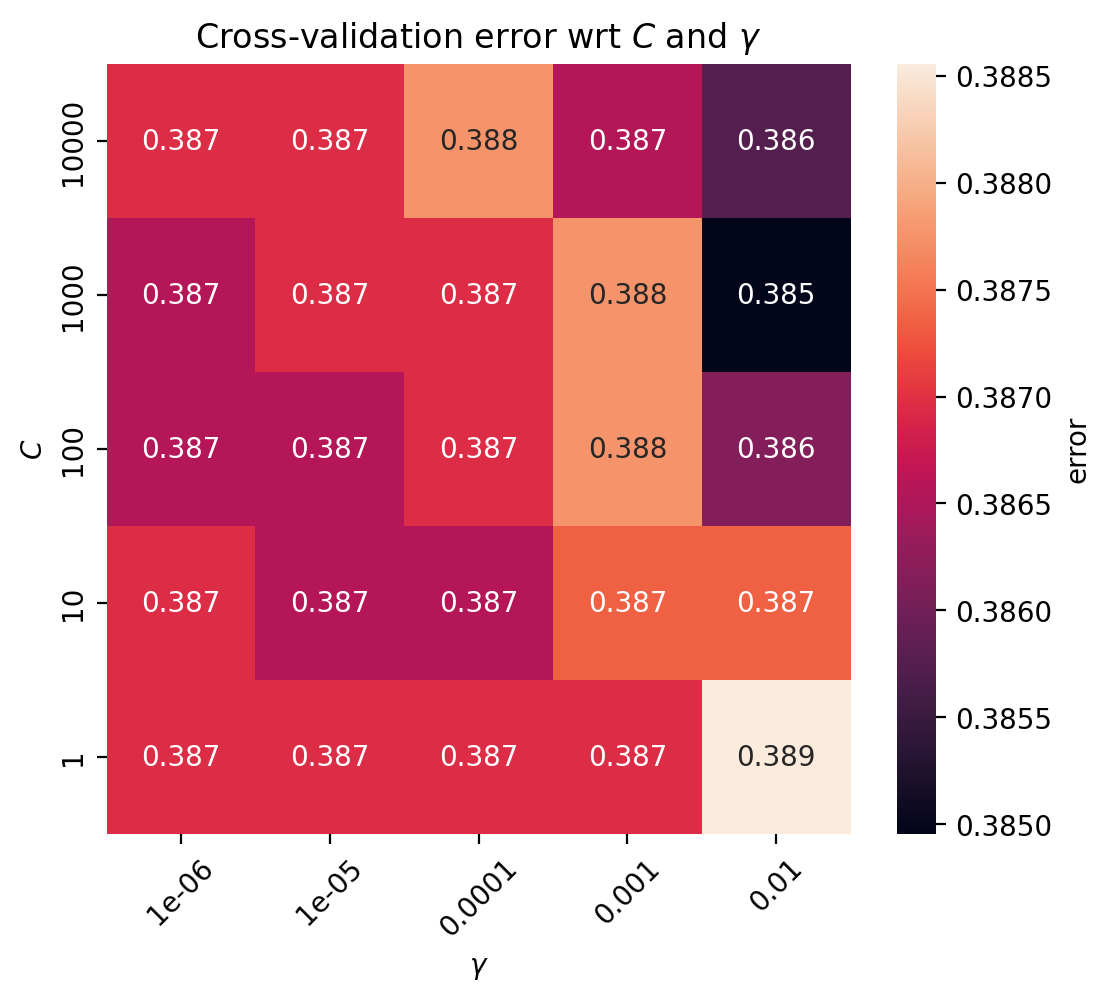

Best CV error = 0.38495390781563127
C* = 1000
gamma* = 0.01
Training error using optimal classifier = 0.32012805122048815
Test error using optimal classifier = 0.41080000000000005


In [39]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros((len(C_list), len(gamma_list)))

best_error = 1.0
opt_C = None
opt_gamma = None
opt_classifier = None

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):

        fold_errors = []

        for train_index, val_index in kf.split(X_train):
            X_tr, X_va = X_train[train_index], X_train[val_index]
            Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

            scaler = StandardScaler()
            X_tr = scaler.fit_transform(X_tr)
            X_va = scaler.transform(X_va)
        
            clf = svm.SVC(C=C, gamma=gamma, kernel='rbf')
            clf.fit(X_tr, Y_tr)

            fold_errors.append(calc_error(X_va, Y_va, clf))

        cv_error = np.mean(fold_errors)
        cv_errors[i,j] = cv_error

        if cv_error < best_error:
            best_error = cv_error
            opt_C = C
            opt_gamma = gamma

opt_classifier = svm.SVC(C=opt_C, gamma=opt_gamma, kernel='rbf')
opt_classifier.fit(X_train, Y_train)

draw_heatmap(cv_errors, gamma_list, C_list)

train_error = calc_error(X_train, Y_train, opt_classifier)
test_error = calc_error(X_test, Y_test, opt_classifier)
print("Best CV error =", best_error)
print("C* =", opt_C)
print("gamma* =", opt_gamma)
print("Training error using optimal classifier =", train_error)
print("Test error using optimal classifier =", test_error)

In [40]:
# Gender dataset
# 80-20 partition
  
# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

# Sampled dataset because it originally had 147270 points
N = X.shape[0]
sample_size = 5000

idx = np.random.choice(N, size=sample_size, replace=False)
X_sample = X[idx]
Y_sample = Y[idx].reshape(-1)

X_and_Y = np.hstack([X_sample,Y_sample.reshape(-1,1)])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X_shuffled = X_and_Y[:,:num]
Y_shuffled = X_and_Y[:,num]
Y_shuffled = Y_shuffled.astype(int)

# 80-20 partition (using count and probability as two columns)
X_train = X_shuffled[:4000][:,[0,1]]        # Shape: (4000, 2)
X_train = np.delete(X_train, 45, axis=0)     # Remove a point for separability
Y_train = Y_shuffled[:4000]                 # Shape: (4000, )
Y_train = np.delete(Y_train, 45, axis=0)     # Remove a point for separability
X_test = X_shuffled[4000:][:,[0,1]]         # Shape: (1000, 2)
Y_test = Y_shuffled[4000:]                  # Shape: (1000, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3999, 2)
(3999,)
(1000, 2)
(1000,)


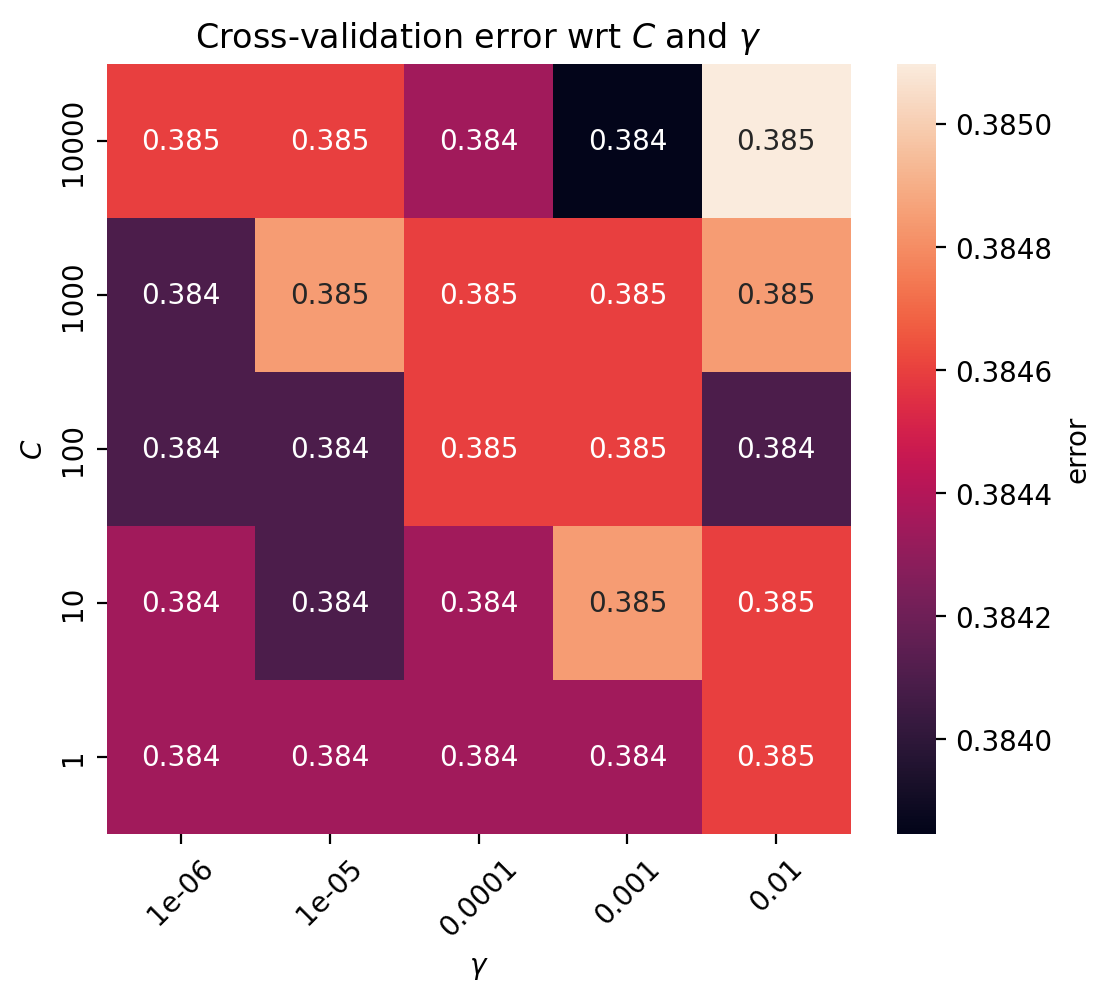

Best CV error = 0.38384637046307885
C* = 10000
gamma* = 0.001
Training error using optimal classifier = 0.3510877719429858
Test error using optimal classifier = 0.41700000000000004


In [41]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros((len(C_list), len(gamma_list)))

best_error = 1.0
opt_C = None
opt_gamma = None
opt_classifier = None

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):

        fold_errors = []

        for train_index, val_index in kf.split(X_train):
            X_tr, X_va = X_train[train_index], X_train[val_index]
            Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

            scaler = StandardScaler()
            X_tr = scaler.fit_transform(X_tr)
            X_va = scaler.transform(X_va)
        
            clf = svm.SVC(C=C, gamma=gamma, kernel='rbf')
            clf.fit(X_tr, Y_tr)

            fold_errors.append(calc_error(X_va, Y_va, clf))

        cv_error = np.mean(fold_errors)
        cv_errors[i,j] = cv_error

        if cv_error < best_error:
            best_error = cv_error
            opt_C = C
            opt_gamma = gamma

opt_classifier = svm.SVC(C=opt_C, gamma=opt_gamma, kernel='rbf')
opt_classifier.fit(X_train, Y_train)

draw_heatmap(cv_errors, gamma_list, C_list)

train_error = calc_error(X_train, Y_train, opt_classifier)
test_error = calc_error(X_test, Y_test, opt_classifier)
print("Best CV error =", best_error)
print("C* =", opt_C)
print("gamma* =", opt_gamma)
print("Training error using optimal classifier =", train_error)
print("Test error using optimal classifier =", test_error)

## Decision Tree - Buntine tree ID3 (using Scikit-Learn) ##

In [42]:
# Draw heatmaps for result of grid search
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

In [43]:
# Gender dataset
# 20-80 partition
  
# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

# Sampled dataset because it originally had 147270 points
N = X.shape[0]
sample_size = 5000

idx = np.random.choice(N, size=sample_size, replace=False)
X_sample = X[idx]
Y_sample = Y[idx].reshape(-1)

X_and_Y = np.hstack([X_sample,Y_sample.reshape(-1,1)])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X_shuffled = X_and_Y[:,:num]
Y_shuffled = X_and_Y[:,num]
Y_shuffled = Y_shuffled.astype(int)


# 20-80 partition (using count and probability as two columns)
X_train = X_shuffled[:1000][:,[0,1]]        # Shape: (1000, 2)
X_train = np.delete(X_train, 45, axis=0)     # Remove a point for separability
Y_train = Y_shuffled[:1000]                 # Shape: (1000, )
Y_train = np.delete(Y_train, 45, axis=0)     # Remove a point for separability
X_test = X_shuffled[1000:][:,[0,1]]         # Shape: (4000, 2)
Y_test = Y_shuffled[1000:]                  # Shape: (4000, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(999, 2)
(999,)
(4000, 2)
(4000,)


In [44]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=10,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


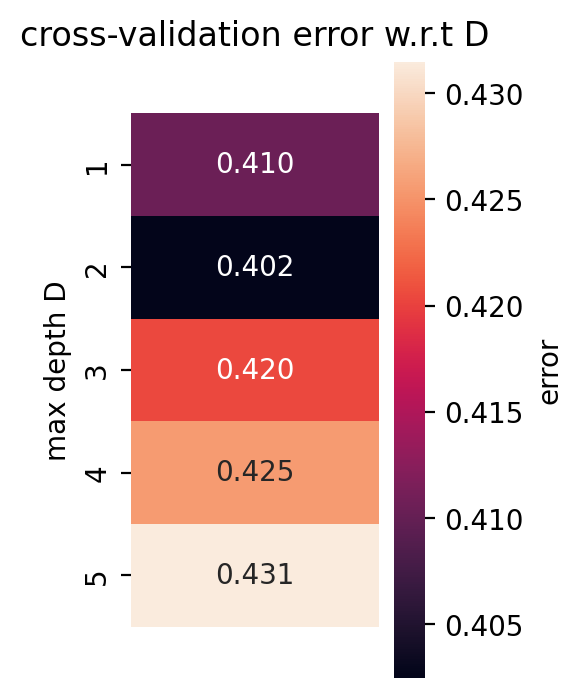

In [45]:
# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

In [46]:
# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

Best max depth D: 2
Training error = 0.38138138138138133
Cross-validated validation error = 0.4024646464646464
Testing error = 0.39025


In [47]:
# Gender dataset
# 50-50 partition
  
# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

# Sampled dataset because it originally had 147270 points
N = X.shape[0]
sample_size = 5000

idx = np.random.choice(N, size=sample_size, replace=False)
X_sample = X[idx]
Y_sample = Y[idx].reshape(-1)

X_and_Y = np.hstack([X_sample,Y_sample.reshape(-1,1)])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X_shuffled = X_and_Y[:,:num]
Y_shuffled = X_and_Y[:,num]
Y_shuffled = Y_shuffled.astype(int)

# 50-50 partition (using count and probability as two columns)
X_train = X_shuffled[:2500][:,[0,1]]        # Shape: (2500, 2)
X_train = np.delete(X_train, 45, axis=0)     # Remove a point for separability
Y_train = Y_shuffled[:2500]                 # Shape: (2500, )
Y_train = np.delete(Y_train, 45, axis=0)     # Remove a point for separability
X_test = X_shuffled[2500:][:,[0,1]]         # Shape: (2500, 2)
Y_test = Y_shuffled[2500:]                  # Shape: (2500, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2499, 2)
(2499,)
(2500, 2)
(2500,)


In [48]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=10,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


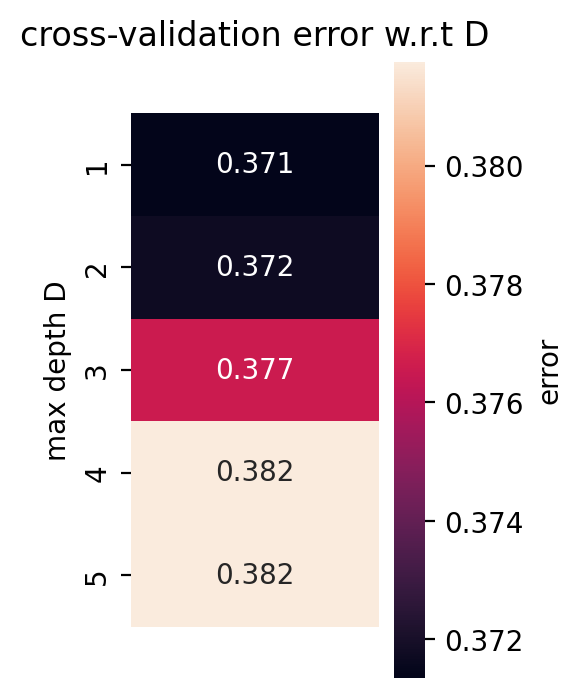

Best max depth D: 1
Training error = 0.3713485394157663
Cross-validated validation error = 0.37134779116465866
Testing error = 0.392


In [49]:
# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

In [50]:
# Gender dataset
# 80-20 partition
  
# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

# Sampled dataset because it originally had 147270 points
N = X.shape[0]
sample_size = 5000

idx = np.random.choice(N, size=sample_size, replace=False)
X_sample = X[idx]
Y_sample = Y[idx].reshape(-1)

X_and_Y = np.hstack([X_sample,Y_sample.reshape(-1,1)])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X_shuffled = X_and_Y[:,:num]
Y_shuffled = X_and_Y[:,num]
Y_shuffled = Y_shuffled.astype(int)

# 80-20 partition (using count and probability as two columns)
X_train = X_shuffled[:4000][:,[0,1]]        # Shape: (4000, 2)
X_train = np.delete(X_train, 45, axis=0)     # Remove a point for separability
Y_train = Y_shuffled[:4000]                 # Shape: (4000, )
Y_train = np.delete(Y_train, 45, axis=0)     # Remove a point for separability
X_test = X_shuffled[4000:][:,[0,1]]         # Shape: (1000, 2)
Y_test = Y_shuffled[4000:]                  # Shape: (1000, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3999, 2)
(3999,)
(1000, 2)
(1000,)


In [51]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=10,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


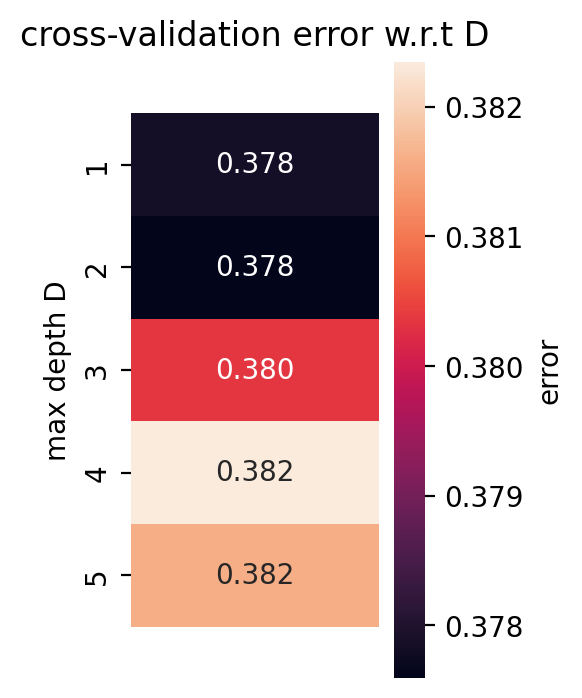

Best max depth D: 2
Training error = 0.3768442110527632
Cross-validated validation error = 0.37759398496240604
Testing error = 0.401


In [52]:
# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

## Random Forests ##

In [53]:
# Gender dataset
# 20-80 partition
  
# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

# Sampled dataset because it originally had 147270 points
N = X.shape[0]
sample_size = 5000

idx = np.random.choice(N, size=sample_size, replace=False)
X_sample = X[idx]
Y_sample = Y[idx].reshape(-1)

X_and_Y = np.hstack([X_sample,Y_sample.reshape(-1,1)])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X_shuffled = X_and_Y[:,:num]
Y_shuffled = X_and_Y[:,num]
Y_shuffled = Y_shuffled.astype(int)


# 20-80 partition (using count and probability as two columns)
X_train = X_shuffled[:1000][:,[0,1]]        # Shape: (1000, 2)
X_train = np.delete(X_train, 45, axis=0)     # Remove a point for separability
Y_train = Y_shuffled[:1000]                 # Shape: (1000, )
Y_train = np.delete(Y_train, 45, axis=0)     # Remove a point for separability
X_test = X_shuffled[1000:][:,[0,1]]         # Shape: (4000, 2)
Y_test = Y_shuffled[1000:]                  # Shape: (4000, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(999, 2)
(999,)
(4000, 2)
(4000,)


In [54]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=1
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 2


In [55]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.2442442442442443
Cross-validated validation error = 0.43345728643216075
Test error = 0.4295


In [56]:
# Gender dataset
# 50-50 partition
  
# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

# Sampled dataset because it originally had 147270 points
N = X.shape[0]
sample_size = 5000

idx = np.random.choice(N, size=sample_size, replace=False)
X_sample = X[idx]
Y_sample = Y[idx].reshape(-1)

X_and_Y = np.hstack([X_sample,Y_sample.reshape(-1,1)])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X_shuffled = X_and_Y[:,:num]
Y_shuffled = X_and_Y[:,num]
Y_shuffled = Y_shuffled.astype(int)

# 50-50 partition (using count and probability as two columns)
X_train = X_shuffled[:2500][:,[0,1]]        # Shape: (2500, 2)
X_train = np.delete(X_train, 45, axis=0)     # Remove a point for separability
Y_train = Y_shuffled[:2500]                 # Shape: (2500, )
Y_train = np.delete(Y_train, 45, axis=0)     # Remove a point for separability
X_test = X_shuffled[2500:][:,[0,1]]         # Shape: (2500, 2)
Y_test = Y_shuffled[2500:]                  # Shape: (2500, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2499, 2)
(2499,)
(2500, 2)
(2500,)


In [57]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=1
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 2


In [58]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.2865146058423369
Cross-validated validation error = 0.4105715430861723
Test error = 0.41759999999999997


In [59]:
# Gender dataset
# 80-20 partition
  
# fetch dataset 
gender_by_name = fetch_ucirepo(id=591) 

pd.options.mode.copy_on_write = True
  
# Data 
df = gender_by_name.data.features
X = df.drop(columns=["Gender", "Name"]).to_numpy()
Y = df["Gender"].map({"M":1, "F":-1}).to_numpy().reshape(-1,1)

# Sampled dataset because it originally had 147270 points
N = X.shape[0]
sample_size = 5000

idx = np.random.choice(N, size=sample_size, replace=False)
X_sample = X[idx]
Y_sample = Y[idx].reshape(-1)

X_and_Y = np.hstack([X_sample,Y_sample.reshape(-1,1)])      
np.random.seed(1)               
np.random.shuffle(X_and_Y)      

num = X_and_Y.shape[1] - 1
X_shuffled = X_and_Y[:,:num]
Y_shuffled = X_and_Y[:,num]
Y_shuffled = Y_shuffled.astype(int)

# 80-20 partition (using count and probability as two columns)
X_train = X_shuffled[:4000][:,[0,1]]        # Shape: (4000, 2)
X_train = np.delete(X_train, 45, axis=0)     # Remove a point for separability
Y_train = Y_shuffled[:4000]                 # Shape: (4000, )
Y_train = np.delete(Y_train, 45, axis=0)     # Remove a point for separability
X_test = X_shuffled[4000:][:,[0,1]]         # Shape: (1000, 2)
Y_test = Y_shuffled[4000:]                  # Shape: (1000, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3999, 2)
(3999,)
(1000, 2)
(1000,)


In [60]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=1
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 1


In [61]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.29832458114528637
Cross-validated validation error = 0.4063479349186483
Test error = 0.43300000000000005


# 1. Occupancy Detection dataset #

In [62]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import scipy.io as sio
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## SVM with the RBF Kernel ##

In [63]:
# Calculate error given feature vectors X and labels Y
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e


# Draw the heatmap of training errors
def draw_heatmap(training_errors, gamma_list, C_list):
    plt.figure(figsize = (6,5))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f',
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel = r'$\gamma$', ylabel=r'$C$')
    plt.title(r'Cross-validation error wrt $C$ and $\gamma$')
    ax.invert_yaxis()
    plt.xticks(rotation=45)
    plt.show()

In [64]:
# fetch dataset
# 20-80 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["HumidityRatio", "CO2"]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(float).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)

# Subset since original had 20560 instances
subset_size = 7500
X_subset = X_and_Y[:subset_size, :2]
Y_subset = X_and_Y[:subset_size, 2].astype(int)

X_train = X_subset[:1500]                # Shape: (1500, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_subset[:1500]                # Shape: (1500, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test  = X_subset[1500:]                # Shape: (6000, 2)
Y_test  = Y_subset[1500:]                # Shape: (6000, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1499, 2)
(1499,)
(6000, 2)
(6000,)


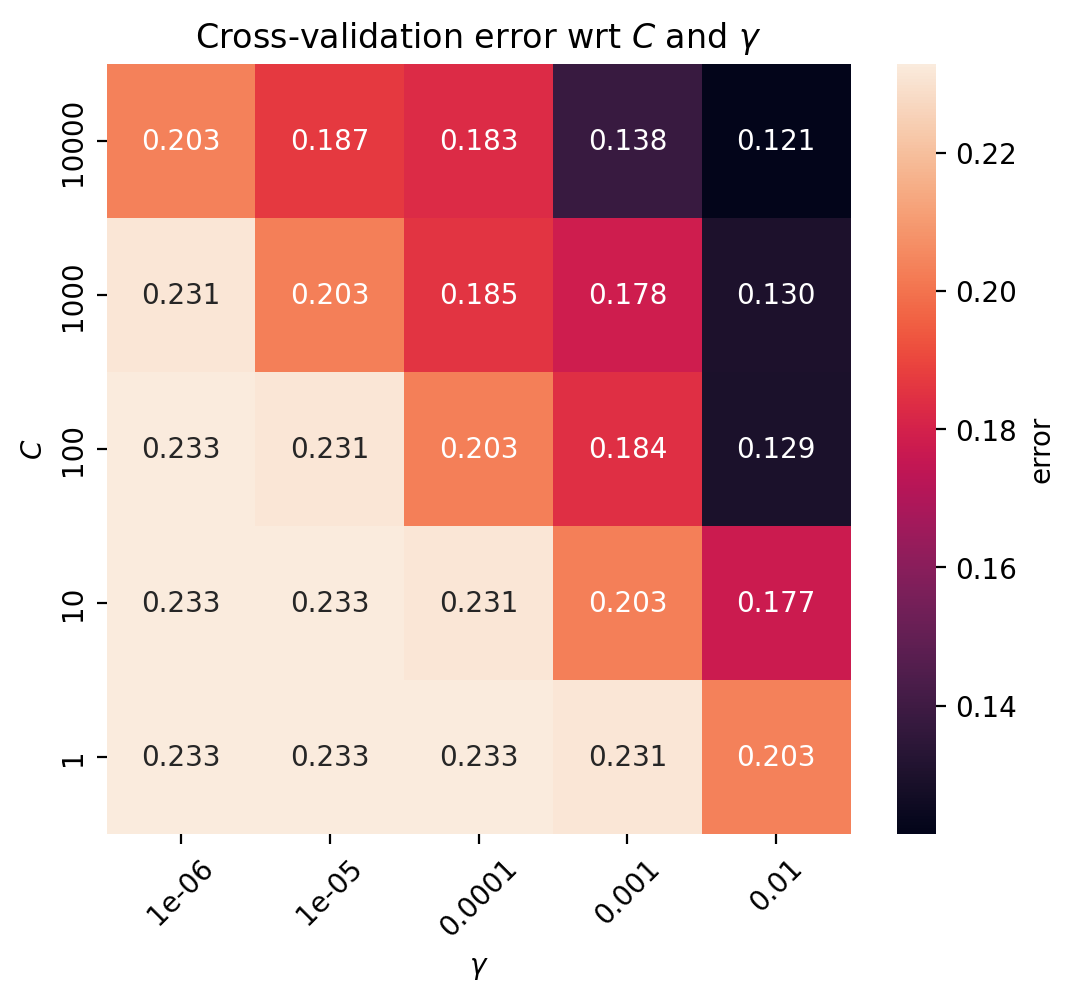

Best CV error = 0.12140914158305463
C* = 10000
gamma* = 0.01
Training error using optimal classifier = 0.08939292861907944
Test error using optimal classifier = 0.16800000000000004


In [65]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros((len(C_list), len(gamma_list)))

best_error = 1.0
opt_C = None
opt_gamma = None
opt_classifier = None

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):

        fold_errors = []

        for train_index, val_index in kf.split(X_train):
            X_tr, X_va = X_train[train_index], X_train[val_index]
            Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

            scaler = StandardScaler()
            X_tr = scaler.fit_transform(X_tr)
            X_va = scaler.transform(X_va)
        
            clf = svm.SVC(C=C, gamma=gamma, kernel='rbf')
            clf.fit(X_tr, Y_tr)

            fold_errors.append(calc_error(X_va, Y_va, clf))

        cv_error = np.mean(fold_errors)
        cv_errors[i,j] = cv_error

        if cv_error < best_error:
            best_error = cv_error
            opt_C = C
            opt_gamma = gamma

opt_classifier = svm.SVC(C=opt_C, gamma=opt_gamma, kernel='rbf')
opt_classifier.fit(X_train, Y_train)

draw_heatmap(cv_errors, gamma_list, C_list)

train_error = calc_error(X_train, Y_train, opt_classifier)
test_error = calc_error(X_test, Y_test, opt_classifier)
print("Best CV error =", best_error)
print("C* =", opt_C)
print("gamma* =", opt_gamma)
print("Training error using optimal classifier =", train_error)
print("Test error using optimal classifier =", test_error)

In [66]:
# fetch dataset
# 50-50 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["HumidityRatio", "CO2"]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(float).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)

# Subset since original had 20560 instances
subset_size = 7500
X_subset = X_and_Y[:subset_size, :2]
Y_subset = X_and_Y[:subset_size, 2].astype(int)

X_train = X_subset[:3750]                  # Shape: (3750, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_subset[:3750]                  # Shape: (3750, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test  = X_subset[3750:]                  # Shape: (3750, 2)
Y_test  = Y_subset[3750:]                  # Shape: (3750, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3749, 2)
(3749,)
(3750, 2)
(3750,)


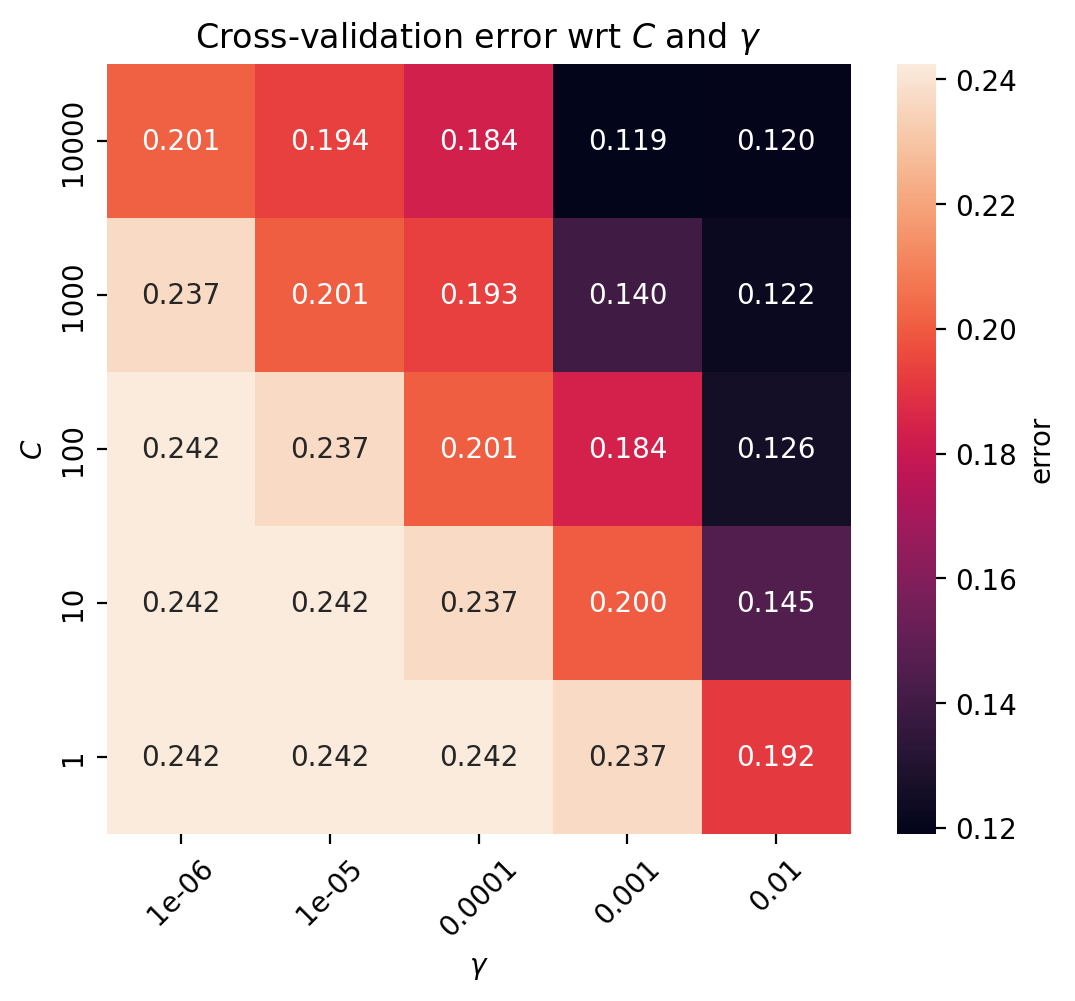

Best CV error = 0.11896323987538941
C* = 10000
gamma* = 0.001
Training error using optimal classifier = 0.1280341424379835
Test error using optimal classifier = 0.1392


In [67]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros((len(C_list), len(gamma_list)))

best_error = 1.0
opt_C = None
opt_gamma = None
opt_classifier = None

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):

        fold_errors = []

        for train_index, val_index in kf.split(X_train):
            X_tr, X_va = X_train[train_index], X_train[val_index]
            Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

            scaler = StandardScaler()
            X_tr = scaler.fit_transform(X_tr)
            X_va = scaler.transform(X_va)
        
            clf = svm.SVC(C=C, gamma=gamma, kernel='rbf')
            clf.fit(X_tr, Y_tr)

            fold_errors.append(calc_error(X_va, Y_va, clf))

        cv_error = np.mean(fold_errors)
        cv_errors[i,j] = cv_error

        if cv_error < best_error:
            best_error = cv_error
            opt_C = C
            opt_gamma = gamma

opt_classifier = svm.SVC(C=opt_C, gamma=opt_gamma, kernel='rbf')
opt_classifier.fit(X_train, Y_train)

draw_heatmap(cv_errors, gamma_list, C_list)

train_error = calc_error(X_train, Y_train, opt_classifier)
test_error = calc_error(X_test, Y_test, opt_classifier)
print("Best CV error =", best_error)
print("C* =", opt_C)
print("gamma* =", opt_gamma)
print("Training error using optimal classifier =", train_error)
print("Test error using optimal classifier =", test_error)

In [68]:
# fetch dataset
# 80-20 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["HumidityRatio", "CO2"]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(float).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)

# Subset since original had 20560 instances
subset_size = 7500
X_subset = X_and_Y[:subset_size, :2]
Y_subset = X_and_Y[:subset_size, 2].astype(int)

X_train = X_subset[:6000]                  # Shape: (6000, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_subset[:6000]                  # Shape: (6000, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test  = X_subset[6000:]                  # Shape: (1500, 2)
Y_test  = Y_subset[6000:]                  # Shape: (1500, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5999, 2)
(5999,)
(1500, 2)
(1500,)


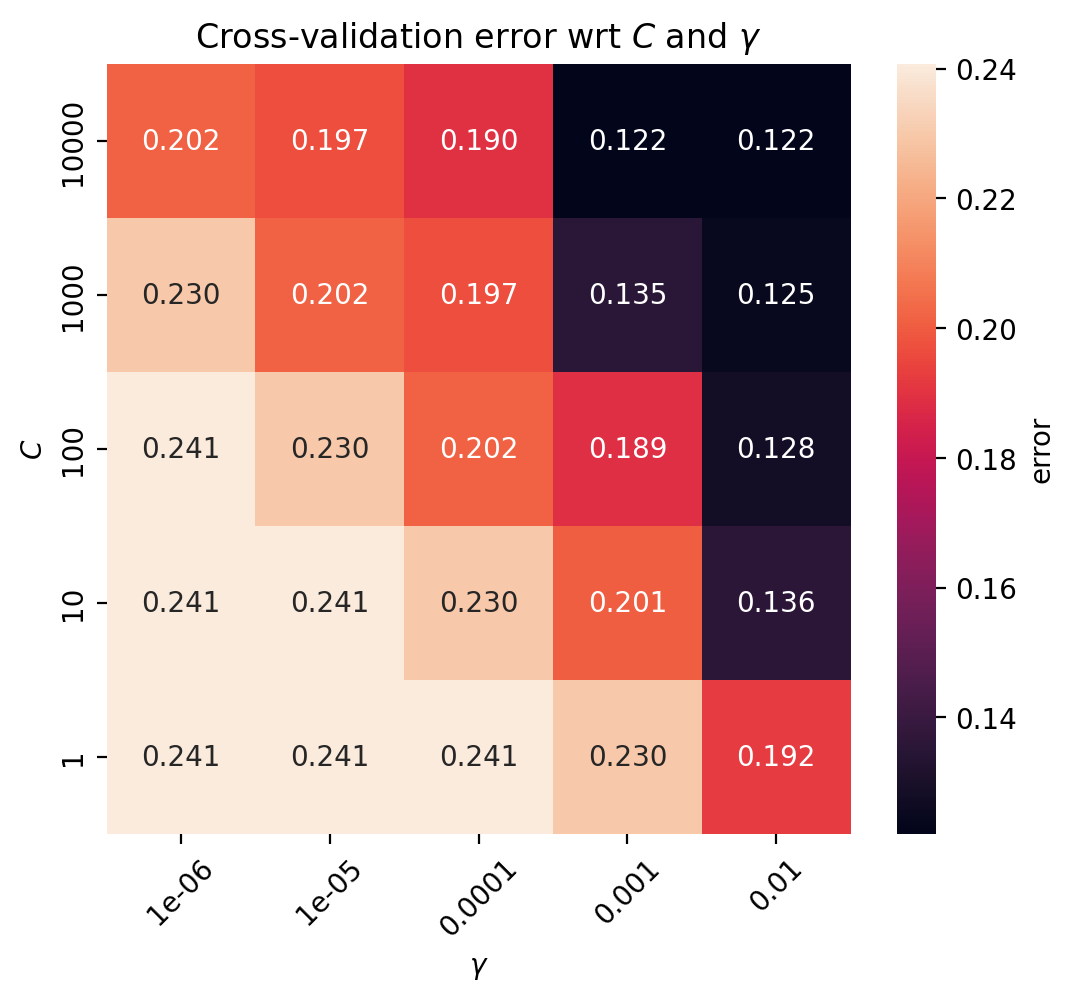

Best CV error = 0.1220194606616625
C* = 10000
gamma* = 0.01
Training error using optimal classifier = 0.12268711451908654
Test error using optimal classifier = 0.1433333333333333


In [69]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]

kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_errors = np.zeros((len(C_list), len(gamma_list)))

best_error = 1.0
opt_C = None
opt_gamma = None
opt_classifier = None

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):

        fold_errors = []

        for train_index, val_index in kf.split(X_train):
            X_tr, X_va = X_train[train_index], X_train[val_index]
            Y_tr, Y_va = Y_train[train_index], Y_train[val_index]

            scaler = StandardScaler()
            X_tr = scaler.fit_transform(X_tr)
            X_va = scaler.transform(X_va)
        
            clf = svm.SVC(C=C, gamma=gamma, kernel='rbf')
            clf.fit(X_tr, Y_tr)

            fold_errors.append(calc_error(X_va, Y_va, clf))

        cv_error = np.mean(fold_errors)
        cv_errors[i,j] = cv_error

        if cv_error < best_error:
            best_error = cv_error
            opt_C = C
            opt_gamma = gamma

opt_classifier = svm.SVC(C=opt_C, gamma=opt_gamma, kernel='rbf')
opt_classifier.fit(X_train, Y_train)

draw_heatmap(cv_errors, gamma_list, C_list)

train_error = calc_error(X_train, Y_train, opt_classifier)
test_error = calc_error(X_test, Y_test, opt_classifier)
print("Best CV error =", best_error)
print("C* =", opt_C)
print("gamma* =", opt_gamma)
print("Training error using optimal classifier =", train_error)
print("Test error using optimal classifier =", test_error)

## Decision Tree - Buntine tree ID3 (using Scikit-Learn) ##

In [70]:
# Draw heatmaps for result of grid search
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

In [71]:
# fetch dataset
# 20-80 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["HumidityRatio", "CO2"]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(float).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)

# Subset since original had 20560 instances
subset_size = 7500
X_subset = X_and_Y[:subset_size, :2]
Y_subset = X_and_Y[:subset_size, 2].astype(int)

X_train = X_subset[:1500]                # Shape: (1500, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_subset[:1500]                # Shape: (1500, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test  = X_subset[1500:]                # Shape: (6000, 2)
Y_test  = Y_subset[1500:]                # Shape: (6000, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1499, 2)
(1499,)
(6000, 2)
(6000,)


In [72]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=10,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


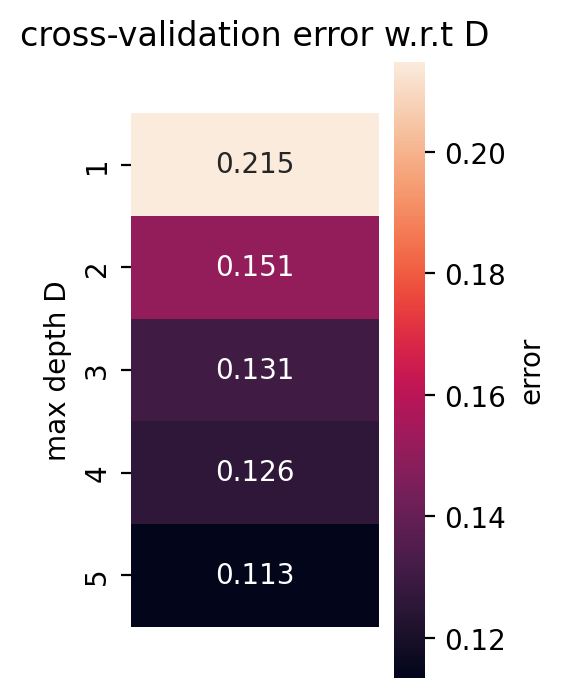

Best max depth D: 5
Training error = 0.09072715143428955
Cross-validated validation error = 0.11340044742729316
Testing error = 0.11399999999999999


In [73]:
# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

In [74]:
# fetch dataset
# 50-50 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["HumidityRatio", "CO2"]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(float).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)

# Subset since original had 20560 instances
subset_size = 7500
X_subset = X_and_Y[:subset_size, :2]
Y_subset = X_and_Y[:subset_size, 2].astype(int)

X_train = X_subset[:3750]                  # Shape: (3750, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_subset[:3750]                  # Shape: (3750, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test  = X_subset[3750:]                  # Shape: (3750, 2)
Y_test  = Y_subset[3750:]                  # Shape: (3750, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3749, 2)
(3749,)
(3750, 2)
(3750,)


In [75]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=10,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


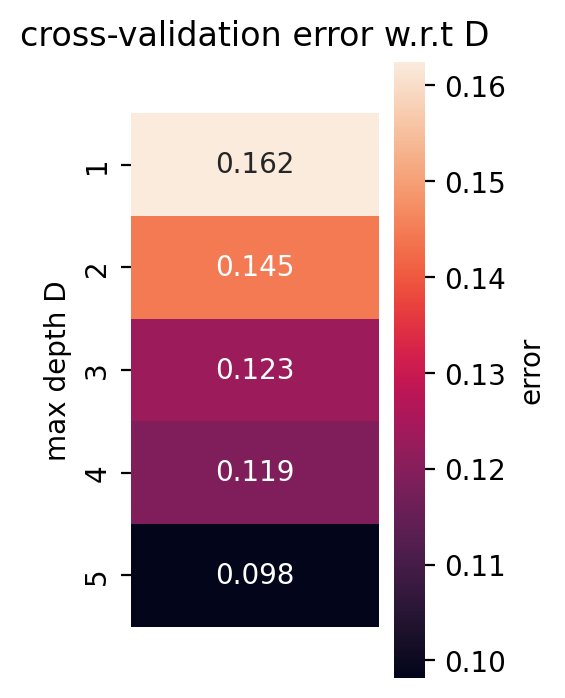

Best max depth D: 5
Training error = 0.08935716190984266
Cross-validated validation error = 0.0981554367201426
Testing error = 0.09999999999999998


In [76]:
# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

In [77]:
# fetch dataset
# 80-20 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["HumidityRatio", "CO2"]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(float).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)

# Subset since original had 20560 instances
subset_size = 7500
X_subset = X_and_Y[:subset_size, :2]
Y_subset = X_and_Y[:subset_size, 2].astype(int)

X_train = X_subset[:6000]                  # Shape: (6000, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_subset[:6000]                  # Shape: (6000, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test  = X_subset[6000:]                  # Shape: (1500, 2)
Y_test  = Y_subset[6000:]                  # Shape: (1500, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5999, 2)
(5999,)
(1500, 2)
(1500,)


In [78]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)

D_list = [1, 2, 3, 4, 5]
param_grid = {
    'max_depth': D_list,
}

grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=10,
    scoring='accuracy')

grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


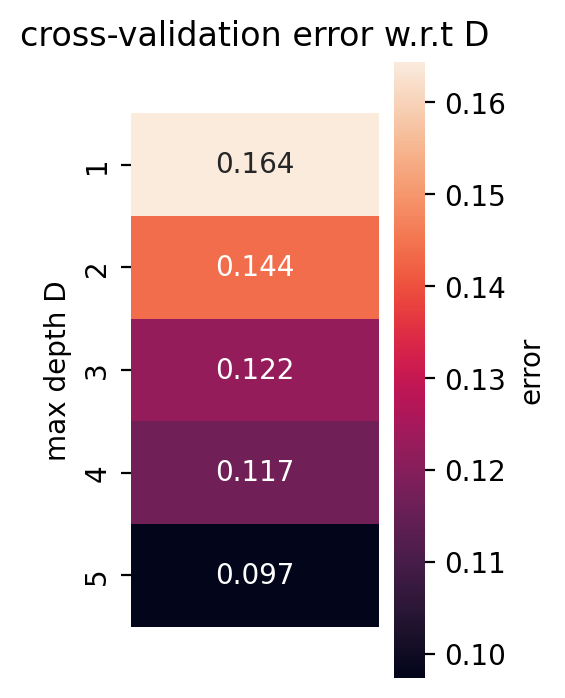

Best max depth D: 5
Training error = 0.09001500250041672
Cross-validated validation error = 0.0973486366165831
Testing error = 0.10533333333333328


In [79]:
# Draw heatmaps of cross-validation errors (in cross-validation)
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max depth D: {}".format(best_max_depth))

# Calculate the errors
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
cv_val_accuracy = grid_search.best_score_
cv_val_error = 1 - cv_val_accuracy
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Training error =", train_error)
print("Cross-validated validation error =", cv_val_error)
print("Testing error =", test_error)

## Random Forests ##

In [80]:
# fetch dataset
# 20-80 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["HumidityRatio", "CO2"]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(float).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)

# Subset since original had 20560 instances
subset_size = 7500
X_subset = X_and_Y[:subset_size, :2]
Y_subset = X_and_Y[:subset_size, 2].astype(int)

X_train = X_subset[:1500]                # Shape: (1500, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_subset[:1500]                # Shape: (1500, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test  = X_subset[1500:]                # Shape: (6000, 2)
Y_test  = Y_subset[1500:]                # Shape: (6000, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1499, 2)
(1499,)
(6000, 2)
(6000,)


In [81]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=1
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 1


In [82]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.0
Cross-validated validation error = 0.09671794871794881
Test error = 0.08433333333333337


In [83]:
# fetch dataset
# 50-50 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["HumidityRatio", "CO2"]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(float).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)

# Subset since original had 20560 instances
subset_size = 7500
X_subset = X_and_Y[:subset_size, :2]
Y_subset = X_and_Y[:subset_size, 2].astype(int)

X_train = X_subset[:3750]                  # Shape: (3750, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_subset[:3750]                  # Shape: (3750, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test  = X_subset[3750:]                  # Shape: (3750, 2)
Y_test  = Y_subset[3750:]                  # Shape: (3750, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3749, 2)
(3749,)
(3750, 2)
(3750,)


In [84]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=1
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 1


In [85]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.0
Cross-validated validation error = 0.07014757454383624
Test error = 0.06720000000000004


In [86]:
# fetch dataset
# 80-20 partition
occupancy_detection = fetch_ucirepo(id=357)

# data
pd.options.mode.copy_on_write = True

df = occupancy_detection.data.features.join(occupancy_detection.data.targets)
df = df.dropna(subset=["Occupancy"])

X = df[["HumidityRatio", "CO2"]].to_numpy()

Y = df["Occupancy"].to_numpy().astype(float).copy()
Y[Y == 0] = -1
Y = Y.reshape(-1,1)

# Shuffle
X_and_Y = np.hstack((X, Y))
np.random.seed(1)
np.random.shuffle(X_and_Y)

# Subset since original had 20560 instances
subset_size = 7500
X_subset = X_and_Y[:subset_size, :2]
Y_subset = X_and_Y[:subset_size, 2].astype(int)

X_train = X_subset[:6000]                  # Shape: (6000, 2)
X_train = np.delete(X_train, 45, axis=0)   # Remove a point for separability
Y_train = Y_subset[:6000]                  # Shape: (6000, )
Y_train = np.delete(Y_train, 45, axis=0)   # Remove a point for separability
X_test  = X_subset[6000:]                  # Shape: (1500, 2)
Y_test  = Y_subset[6000:]                  # Shape: (1500, )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5999, 2)
(5999,)
(1500, 2)
(1500,)


In [87]:
n_list = [1,2,4,6,8,12,16,20]

param_grid = {
    'max_features': n_list
}

clf = RandomForestClassifier(
    n_estimators=1024,
    bootstrap=True,
    random_state=1,
    n_jobs=1
)

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid_search.fit(X_train, Y_train)

best_n = grid_search.best_params_['max_features']
print("Best n =", best_n)

Best n = 1


In [88]:
train_pred = grid_search.best_estimator_.predict(X_train)
train_error = 1 - accuracy_score(Y_train, train_pred)
print("Training error =", train_error)
val_error = 1 - grid_search.best_score_
print("Cross-validated validation error =", val_error)
test_pred = grid_search.best_estimator_.predict(X_test)
test_error = 1 - accuracy_score(Y_test, test_pred)
print("Test error =", test_error)

Training error = 0.0
Cross-validated validation error = 0.06200834028356961
Test error = 0.06533333333333335
